In [1]:
cd D:\Downloads

D:\Downloads


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
df = pd.DataFrame(pd.read_csv("Iris.csv"))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
categories = df.Species.unique()
categories

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df['Species'] = df['Species'].astype('category').cat.codes
data = np.array(df)
x_train = data[:, 1:5]
y_train = data[:, 5]

C:\Users\ROSE S JOSE\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ROSE S JOSE\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


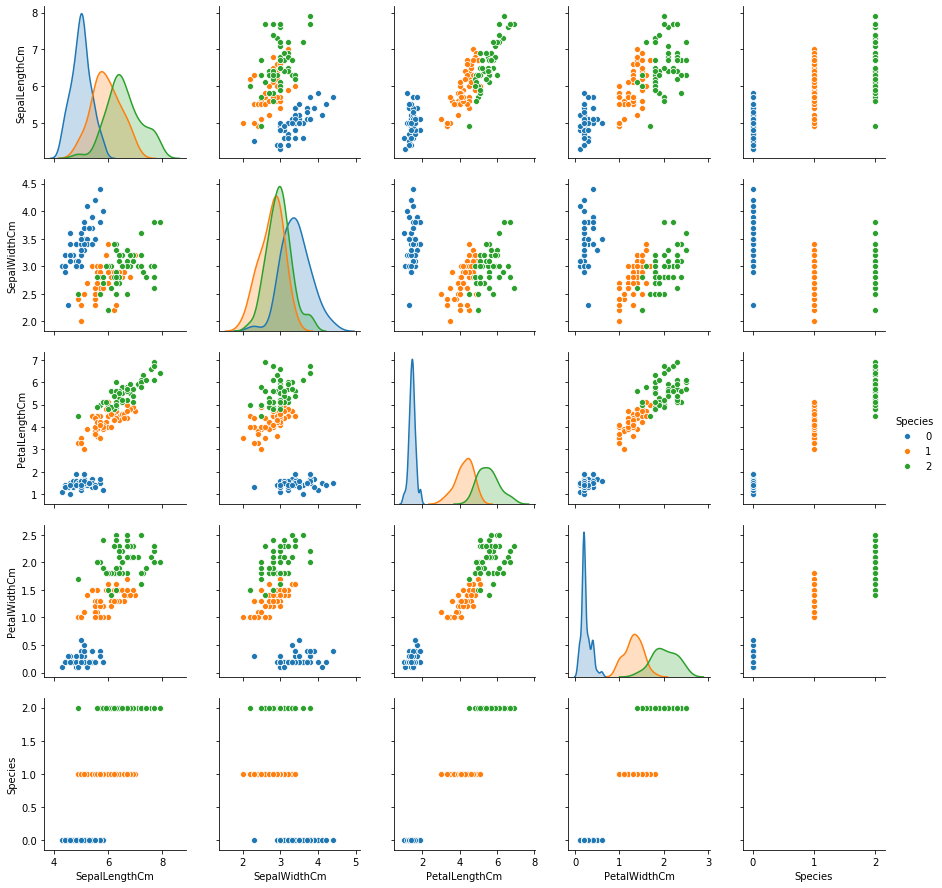

In [7]:
seaborn.pairplot(df.iloc[:,1:6], hue='Species')

In [8]:
def cost(theta, x, y):
    h = x@theta
    m = len(y)
    cost = 1 / m * np.sum((y-h)**2) #Mean Square error
    grad = 1 / m * (y - h)@x
    return cost, grad

In [31]:
def fit(x, y, max_iter=1000, alpha=0.01):
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        
        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta += alpha * grad
            
        thetas.append(theta)
    return thetas, classes, costs

In [23]:
def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [(xi @ theta) for theta in thetas]
    ) for xi in x]
    print(preds)
    return [classes[p] for p in preds]

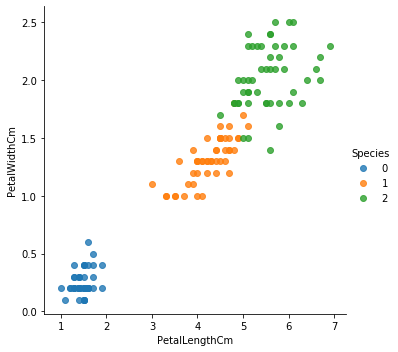

In [17]:
seaborn.lmplot('PetalLengthCm', 'PetalWidthCm', data=df, hue='Species', fit_reg=False)

##### Using PetalLength and PetalWidth

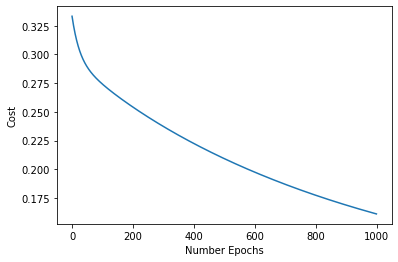

In [12]:
thetas, classes, costs = fit(x_train[:, 2:], y_train)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');

In [13]:
thetas

[array([ 1.25209331, -0.25581343, -0.0200291 ]),
 array([-0.10233566,  0.26769236, -0.63031336]),
 array([-0.1811795 , -0.11849326,  0.59791724])]

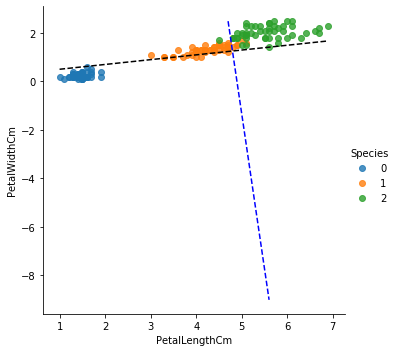

In [26]:
seaborn.lmplot('PetalLengthCm', 'PetalWidthCm', data=df, hue='Species', fit_reg=False)
i = 0
for theta in [thetas[0], thetas[2]]:
    #l = np.array([np.median(x_train[:, 2]), stat.mode(x_train[:, 2])])
    if i == 0:
        l = np.array([x_train[:, 2][50], x_train[:, 2][140]])
        m = -(l * theta[1] + theta[0]) / theta[2]
        plt.plot(l, m, color='b', linestyle="--")
        i+=1
    else:
        j = np.array([x_train[:, 2].min(), x_train[:, 2].max()])
        k = -(j * theta[1] + theta[0]) / theta[2]
        plt.plot(j, k, color='k', linestyle="--")

Here the blue line should seperate classes 0 from 1 and 2. But here we can see that some examples of category of class 1 is predicted as of class 0.

Then the black line should seperate class 2 from 1 and 0. But we can see that some examples in class 1 is predicted as class 2.

In [24]:
y_pred=predict(classes, thetas, x_train[:, 2:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[50,  0,  0],
       [15, 25, 10],
       [ 0, 12, 38]], dtype=int64)

##### Using the whole 4 features

In [32]:
thetas, classes, costs = fit(x_train, y_train)

In [33]:
thetas

[array([ 0.0488104 ,  0.09414689,  0.22493629, -0.22539499, -0.08826653]),
 array([ 0.1258104 ,  0.14567649, -0.22120376,  0.07212162, -0.20927337]),
 array([-0.07459009, -0.11325575,  0.08508432,  0.1324718 ,  0.26467667])]

In [34]:
y_pred=predict(classes, thetas, x_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[50,  0,  0],
       [ 1, 27, 22],
       [ 0,  2, 48]], dtype=int64)